In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [3]:
trainSet = pd.read_csv(r'train.csv')
testSet = pd.read_csv(r'test.csv')
trainSet.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
"""
fig,axis = plt.subplots(figsize=(18,18))
corr = trainSet.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,ax=axis,mask=mask,square=True)
"""
trainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

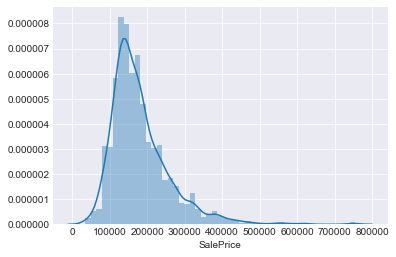

In [27]:
sns.distplot(trainSet['SalePrice'])

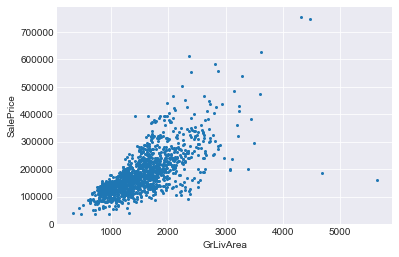

In [33]:
temp = trainSet[['GrLivArea','SalePrice']]
plt.scatter(temp['GrLivArea'],temp['SalePrice'],s=4)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
#sns.lmplot(data=trainSet,x=trainSet['GrLivArea'],y=trainSet['SalePrice'],fit_reg=False)

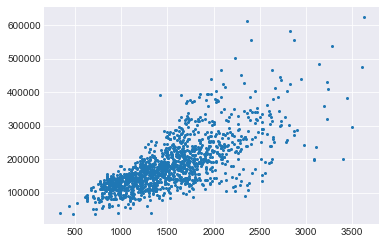

In [35]:
trainSet = trainSet[trainSet['GrLivArea']<=4000]
plt.scatter(trainSet['GrLivArea'],trainSet['SalePrice'],s=4)

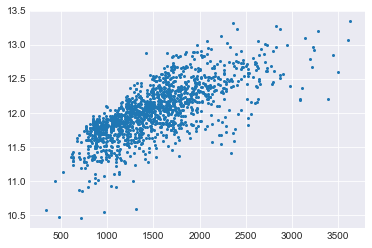

In [36]:
trainSet['SalePrice'] = np.log1p(trainSet['SalePrice'])
plt.scatter(trainSet['GrLivArea'],trainSet['SalePrice'],s=4)

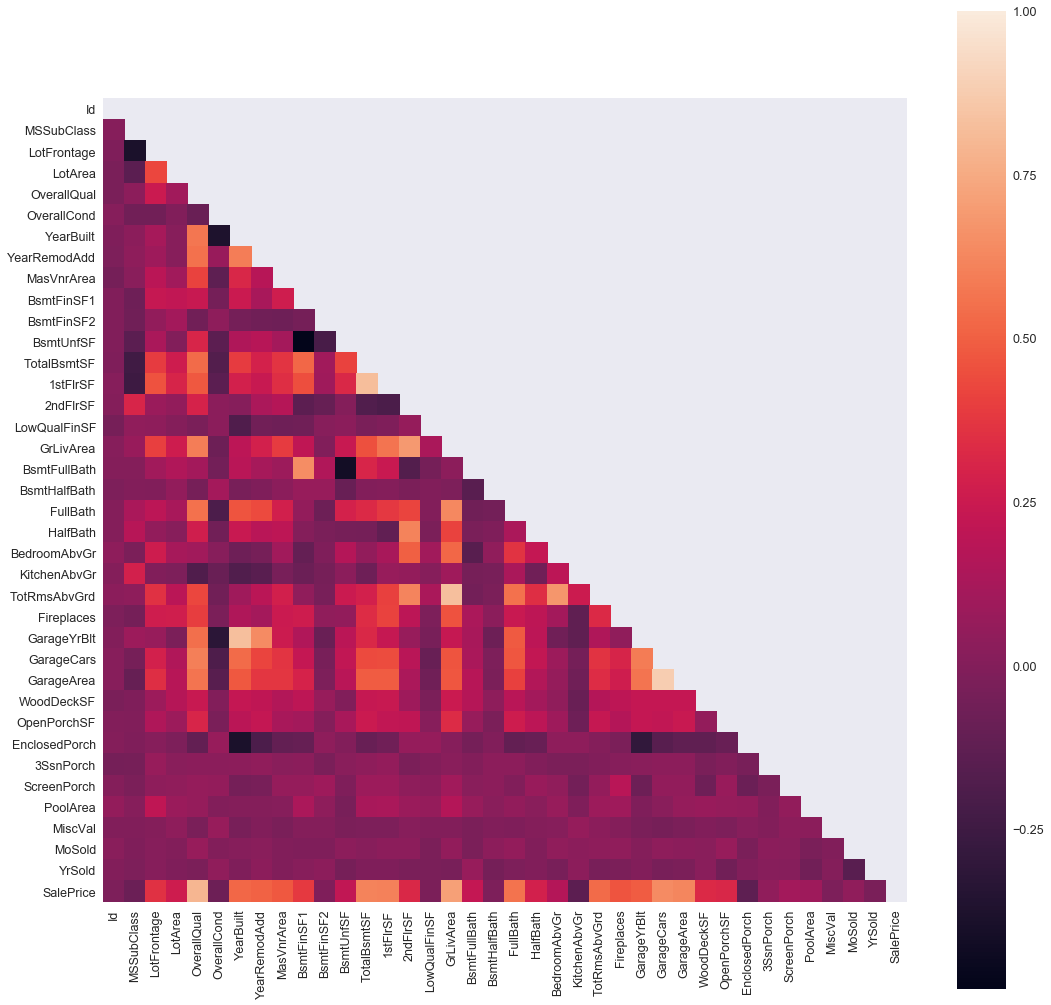

In [18]:
fig,axis = plt.subplots(figsize=(18,18))
corr = trainSet.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,ax=axis,mask=mask,square=True)
plt.show()
plt.gcf().clear()

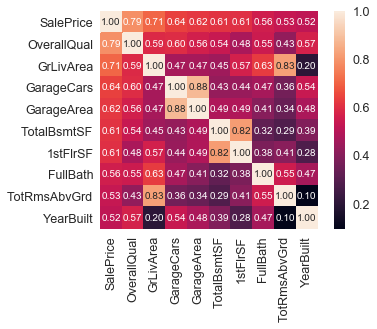

In [15]:
k = 10
cols = corr.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(trainSet[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [16]:
train_med = trainSet.copy()

In [17]:
gb_neigh_LF = trainSet['LotFrontage'].groupby(trainSet['Neighborhood'])
gb_neigh_LF.head()

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
5       85.0
6       75.0
7        NaN
8       51.0
9       50.0
10      70.0
11      85.0
12       NaN
13      91.0
14       NaN
15      51.0
16       NaN
17      72.0
18      66.0
19      70.0
20     101.0
21      57.0
22      75.0
23      44.0
24       NaN
25     110.0
26      60.0
27      98.0
28      47.0
29      60.0
       ...  
195     24.0
219     43.0
225     21.0
226     82.0
227     21.0
229     43.0
231    174.0
232     21.0
235     21.0
267     60.0
272     92.0
291     55.0
326     32.0
336     86.0
344     36.0
354     60.0
357     44.0
363     21.0
380     50.0
385     43.0
400     38.0
406     51.0
434     21.0
443     53.0
465      NaN
504     24.0
550     53.0
599     24.0
675     24.0
956     24.0
Name: LotFrontage, Length: 122, dtype: float64

In [20]:
train_0 = trainSet.copy()
null_index = train_0.LotFrontage.isnull()
train_0.loc[null_index,'LotFrontage'] = 0
train_0['LotFrontage'].describe()

count    1460.000000
mean       57.623288
std        34.664304
min         0.000000
25%        42.000000
50%        63.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

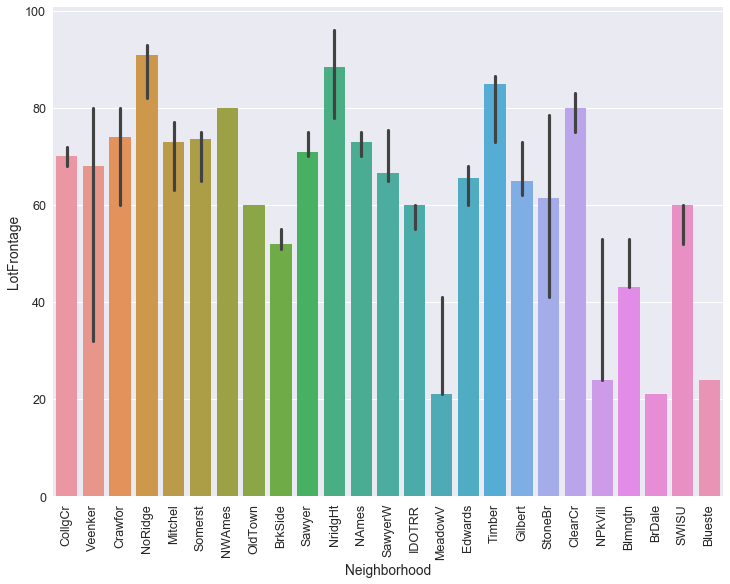

In [26]:
f,ax = plt.subplots(figsize=(12,9))
sns.barplot(ax=ax,data=trainSet,x='Neighborhood',y='LotFrontage',estimator = np.median)
plt.xticks(rotation=90)
plt.show()
plt.gcf().clear()

In [34]:
gb_neigh_LF.mean()

Neighborhood
Blmngtn    47.142857
Blueste    24.000000
BrDale     21.562500
BrkSide    57.509804
ClearCr    83.461538
CollgCr    71.682540
Crawfor    71.804878
Edwards    68.217391
Gilbert    79.877551
IDOTRR     62.500000
MeadowV    27.800000
Mitchel    70.083333
NAmes      76.462366
NPkVill    32.285714
NWAmes     81.288889
NoRidge    91.878788
NridgHt    81.881579
OldTown    62.788991
SWISU      58.913043
Sawyer     74.437500
SawyerW    71.500000
Somerst    64.666667
StoneBr    62.700000
Timber     80.133333
Veenker    59.714286
Name: LotFrontage, dtype: float64

In [37]:
total = trainSet.isnull().sum().sort_values(ascending=False)
percent = (trainSet.isnull().sum()/trainSet.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
